In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## 🔄 Load processed datasets
We load the two preprocessed datasets from the Data folder.

In [12]:
df_with_price = pd.read_csv("../data/products_with_price.csv")
df_without_price = pd.read_csv("../data/products_without_price.csv")

print("With price:", df_with_price.shape)
print("Without price:", df_without_price.shape)

df_with_price

With price: (20, 47)
Without price: (20, 46)


,name,price,rating,stock,warranty_years,weight_kg,volume_cm3,power_watt,category_Accessories,category_Electronics,...,material_type_Mixed,material_type_Plastic,usage_type_Accessory,usage_type_Display,usage_type_Furniture,usage_type_Peripheral,usage_type_Storage,price_category_High,price_category_Low,price_category_Medium
0,Wireless Mouse,15.99,4.4,158,3,5.26,11659.0,2.0,True,False,...,False,False,False,False,False,True,False,False,True,False
1,Keyboard,22.50,4.2,106,3,5.56,16437.0,0.0,True,False,...,False,False,False,False,False,True,False,False,False,True
2,Laptop Stand,25.00,4.3,274,1,0.47,3032.0,20.0,True,False,...,True,False,False,False,True,False,False,False,False,True
3,Webcam,45.00,4.1,257,1,5.45,3815.0,10.0,False,True,...,True,False,False,False,False,False,True,False,False,True
4,Headset,29.99,4.3,252,1,2.67,24907.0,5.0,True,False,...,False,False,True,False,False,False,False,False,False,True
5,External HDD,60.00,4.7,114,3,0.96,20116.0,5.0,False,False,...,True,False,False,False,False,True,False,False,False,True
6,Portable SSD,80.00,4.6,168,3,1.13,17074.0,2.0,False,False,...,True,False,True,False,False,False,False,True,False,False
7,Printer,120.00,4.9,40,3,5.16,17893.0,10.0,False,True,...,False,True,False,False,False,False,True,True,False,False
8,Gaming Mouse,35.00,4.9,156,2,2.86,16369.0,0.0,True,False,...,True,False,False,True,False,False,False,False,False,True
9,Mechanical Keyboard,70.00,4.2,58,2,3.44,15035.0,10.0,True,False,...,True,False,False,True,False,False,False,True,False,False


## 📊 Elbow Method: Determine optimal number of clusters
We use the elbow method on both datasets to find the best k.

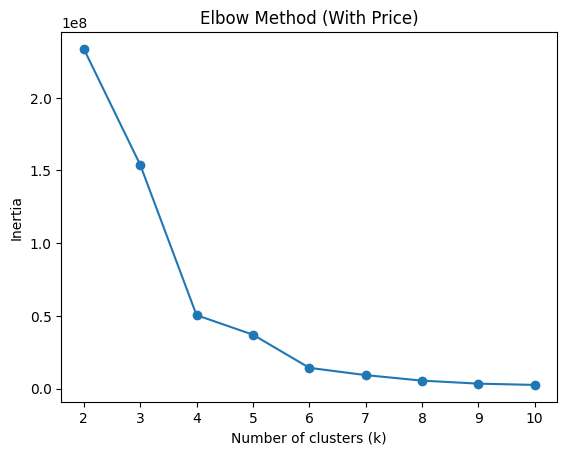

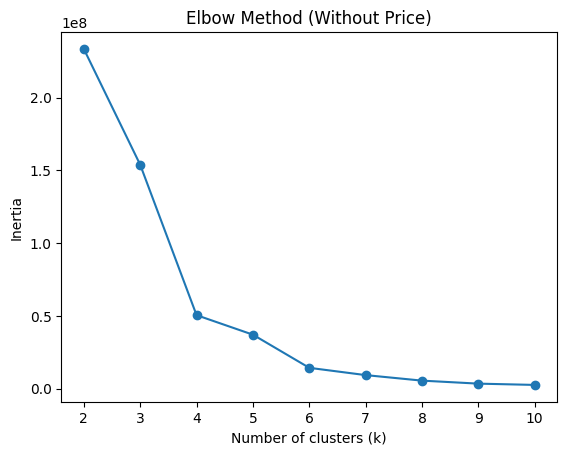

In [13]:

def plot_elbow(data, title):
    # نأخذ فقط الأعمدة الرقمية (float و int)
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    inertias = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numeric_data)
        inertias.append(kmeans.inertia_)
    
    plt.plot(K, inertias, marker='o')
    plt.title(title)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.show()


# استدعاء الدالة مع بيانات المنتجات
plot_elbow(df_with_price, "Elbow Method (With Price)")
plot_elbow(df_without_price, "Elbow Method (Without Price)")


In [ ]:
df_with_price.drop(columns=['name'], inplace=True)
df_without_price.drop(columns=['name'], inplace=True)



In [22]:
scaler = StandardScaler()
data_scaled_with_price = scaler.fit_transform(df_with_price)
data_scaled_without_price = scaler.fit_transform(df_without_price)

## 🔐 Apply KMeans Clustering
We apply KMeans using a chosen number of clusters (e.g., 4).

In [23]:
k = 4

# إنشاء النماذج
kmeans_with_price = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans_without_price = KMeans(n_clusters=k, random_state=0, n_init=10)

# تدريب النماذج وتوقع العناقيد
clusters_with_price = kmeans_with_price.fit_predict(data_scaled_with_price)
clusters_without_price = kmeans_without_price.fit_predict(data_scaled_without_price)

In [24]:
df_with_price['cluster'] = clusters_with_price
df_without_price['cluster'] = clusters_without_price


## 🧠 Visualize Clusters using PCA (2D)
We reduce the data to 2 dimensions for visual analysis.

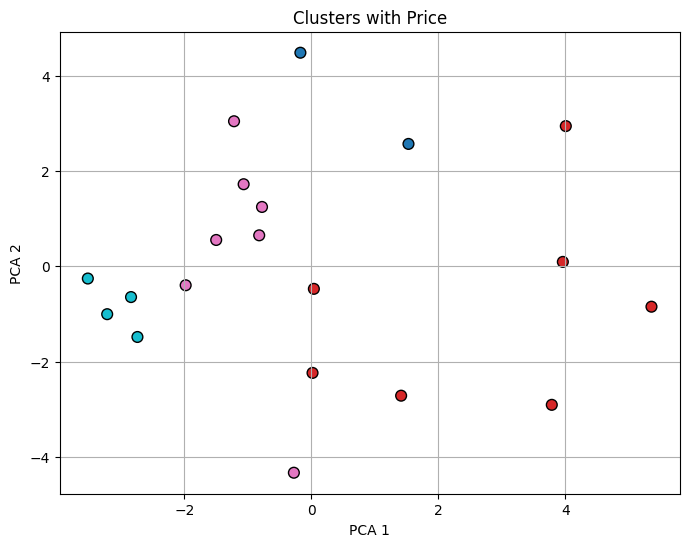

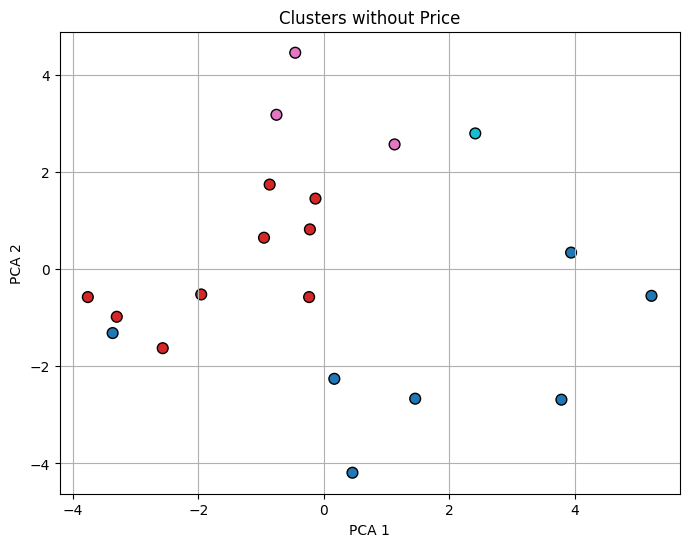

In [26]:
def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="tab10", s=60, edgecolor='k')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()


# رسم العناقيد التي تم توليدها على البيانات مع السعر
plot_clusters(data_scaled_with_price, clusters_with_price, "Clusters with Price")
# رسم العناقيد التي تم توليدها على البيانات بدون السعر
plot_clusters(data_scaled_without_price, clusters_without_price, "Clusters without Price")


## 📐 Silhouette Score
To compare clustering quality quantitatively.

In [28]:
score_with_price = silhouette_score(data_scaled_with_price, clusters_with_price)
score_without_price = silhouette_score(data_scaled_without_price, clusters_without_price)

print(f"✅ Silhouette Score (with price): {score_with_price:.4f}")
print(f"✅ Silhouette Score (without price ): {score_without_price:.4f}")


✅ Silhouette Score (with price): 0.0524
✅ Silhouette Score (without price ): 0.0610


## 💾 Save Cluster Assignments
We save the cluster IDs to later merge with product IDs.

In [29]:
# إعادة ربط رقم العنقود مع أسماء المنتجات (نفترض أنك ما زلت تملك الأصلية)
original_df = pd.read_csv("../data/Extended_Products_Dataset__25_Products.csv")
original_df.columns = original_df.columns.str.strip().str.lower().str.replace(' ', '_')

# نسخة مع السعر
clustered_with_price = original_df.copy()
clustered_with_price['cluster'] = df_with_price['cluster']
clustered_with_price[['productid', 'productname', 'cluster']].to_csv(
    "../data/products_names_with_clusters_with_price.csv", index=False
)

# نسخة بدون السعر
clustered_without_price = original_df.copy()
clustered_without_price['cluster'] = df_without_price['cluster']
clustered_without_price[['productid', 'productname', 'cluster']].to_csv(
    "../data/products_names_with_clusters_without_price.csv", index=False
)

print("✅ تم حفظ ملفات مرتبطة بأسماء المنتجات والعناقيد.")


✅ تم حفظ ملفات مرتبطة بأسماء المنتجات والعناقيد.
